In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')

In [3]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


发现日期栏是有问题的，数据类型为int，应该为日期形式

In [5]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [6]:
df['order_dt']=pd.to_datetime(df.order_dt,format="%Y%m%d")
df.head()

,user_id,order_dt,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [7]:
#提取日期中的月份
df['month']=df.order_dt.values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


# 一、用户消费趋势分析（按月）
-每月的消费金额  
-每月的消费次数  
-每月购买产品的数量  
-每月消费人数  
-每月用户平均消费金额  
-每月用户平均消费次数的趋势

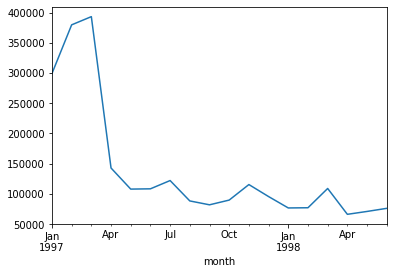

In [8]:
#每月的消费金额
grouped_month=df.groupby('month')
order_month_amount=grouped_month.order_amount.sum()
order_month_amount.plot()

消费金额在1-3月处于高位，并且呈上升趋势，随后经历大幅下降，逐渐趋于平稳波动状态，在9月处于最低谷

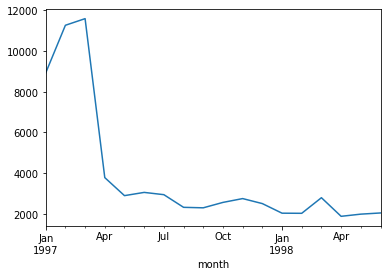

In [9]:
#每月消费的次数
order_num=grouped_month.user_id.count()
order_num.plot()

消费次数在1-3月处于高水平，均超过10000，最高点在14000 随后经历下降，逐渐趋于平稳波动状态7-12月均低于3000

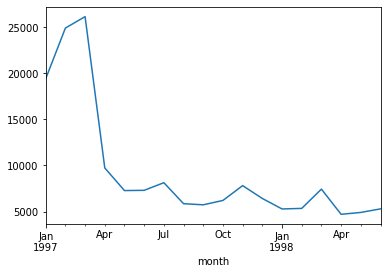

In [10]:
#每月购买产品的数量
product_num=grouped_month.order_products.sum()
product_num.plot()

每月购买产品的数量在1-3月呈上升趋势，在3月到达峰值之后开始急剧下降，4月态势逐渐平稳，最低值在8-9月

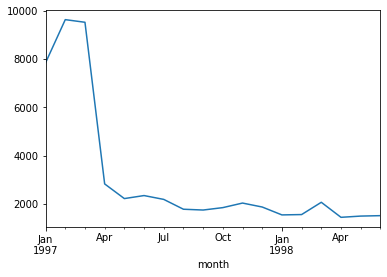

In [11]:
#每月消费人数
user_num=grouped_month.user_id.apply(lambda x:len((x.drop_duplicates())))
user_num.plot()

用户数在2-3月水平稳定，保持在10000以上 3月开始呈急剧下降趋势，到4月趋于平稳4-12月的用户数低于4000 8-9月处于最低谷 约为2000

In [12]:
#用数据透视的方法
df.pivot_table(index='month',
               values=['order_amount','order_products','user_id'],
               aggfunc={
                   'order_amount':'sum',
                   'order_products':'sum',
                   'user_id':'count'
               }
)

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


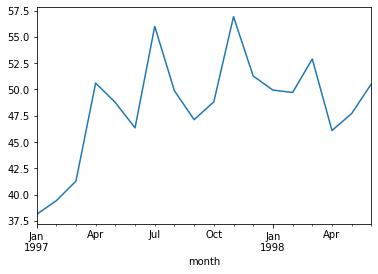

In [13]:
#每月用户平均消费金额
avg_cost=order_month_amount/user_num
avg_cost.plot()

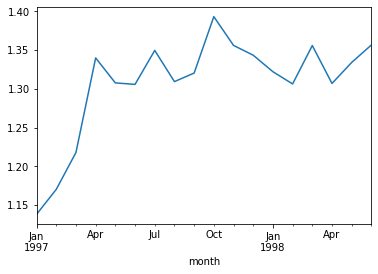

In [14]:
#每月用户平均消费次数的趋势
avg_num=order_num/user_num
avg_num.plot()

# 二、用户个体消费分析
-用户消费金额、消费次数的描点统计  
-用户金额和消费的散点图  
-用户消费金额的分布图  
-用户消费次数的分布图  
-用户累计消费金额百分比（百分之多少的用户消费了百分之多少的金额）

In [15]:
grouped_user=df.groupby('user_id')

In [16]:
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


用户购买数目的平均值是7 但是中位数却是3 说明少部分的用户购买了大量的产品  
购买金额的均值是106 但中位数只有43 说明少部分的用户花费占了大部分

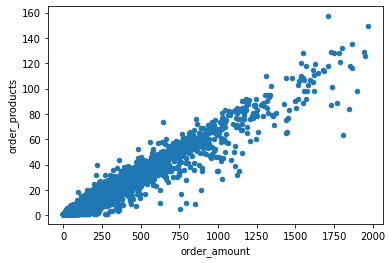

In [17]:
grouped_user.sum().query('order_amount<2000').plot.scatter(x='order_amount',y='order_products')

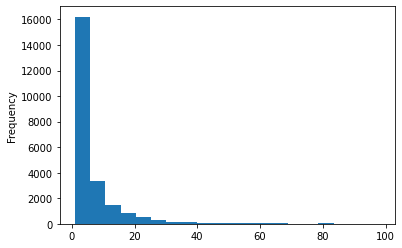

In [18]:
grouped_user.sum().query('order_products<100').order_products.plot.hist(bins=20)

In [19]:
user_consum=grouped_user.sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())
user_consum

,order_products,order_amount
user_id,,
10175,0.000006,0.000000
4559,0.000012,0.000000
1948,0.000018,0.000000
925,0.000024,0.000000
10798,0.000030,0.000000
...,...,...
7931,0.982940,0.985405
19339,0.985192,0.988025
7983,0.988385,0.990814


In [20]:
user_consum.reset_index()

,user_id,order_products,order_amount
0,10175,0.000006,0.000000
1,4559,0.000012,0.000000
2,1948,0.000018,0.000000
3,925,0.000024,0.000000
4,10798,0.000030,0.000000
...,...,...,...
23565,7931,0.982940,0.985405
23566,19339,0.985192,0.988025
23567,7983,0.988385,0.990814
23568,14048,0.994538,0.994404


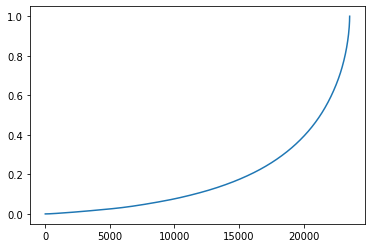

In [21]:
user_consum.reset_index().order_amount.plot()

由图可知，50%的用户贡献了约15%的消费额

横轴为用户数

# 三、用户消费行为
-用户第一次消费（首购）  
-用户最后一次消费  
-新老客户消费比  
  -多少用户仅消费了一次  
  -每月新客占比  
-用户分层  
  -RFM
  -新、老、活跃、回流、流失  
-用户购买周期（按订单）  
  -用户消费周期描述  
  -用户消费周期分布  
-用户生命周期（按第一次，最后一次消费）  
  -用户生命周期描述  
  -用户生命周期分布

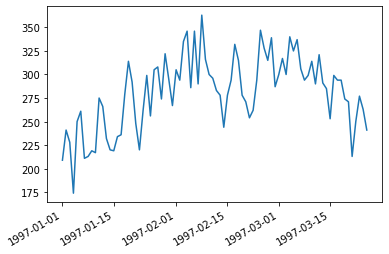

In [22]:
grouped_user.min().order_dt.value_counts().plot()

用户第一次购买（首购）的分布，集中在前三个月

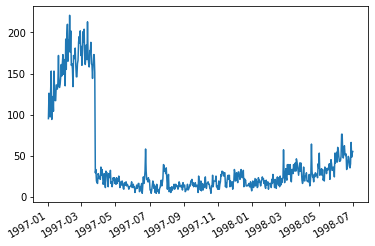

In [23]:
grouped_user.max().order_dt.value_counts().plot()

大部分的最后一次购买集中在前三个月，而用户的首次购买也集中在前三个月，说明有相当一部分的用户首次购买之后便不再进行下一次的购买了

In [24]:
user_life=grouped_user.order_dt.agg(['max','min'])
user_life.head()

,max,min
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1998-05-28,1997-01-02
4,1997-12-12,1997-01-01
5,1998-01-03,1997-01-01


In [25]:
(user_life['max']==user_life['min']).value_counts()

True     12054
False    11516
dtype: int64

有超过一半的用户，只消费了一次

In [26]:
rfm=df.pivot_table(index='user_id',
                  values=['order_products','order_amount','order_dt'],
                   aggfunc={
                       'order_dt':'max',
                       'order_amount':'sum',
                       'order_products':'sum'
                   }
                  )
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [27]:
rfm['R']=-(rfm.order_dt-rfm.order_dt.max())/np.timedelta64(1,'D')
rfm['R']

user_id
1        545.0
2        534.0
3         33.0
4        200.0
5        178.0
         ...  
23566    462.0
23567    462.0
23568    434.0
23569    462.0
23570    461.0
Name: R, Length: 23570, dtype: float64

In [28]:
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)

In [29]:
rfm

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,6,434.0


In [30]:
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    label=level.R+level.F+level.M
    d={
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result=d[label]
    return result
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)

In [31]:
rfm

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户
...,...,...,...,...,...
23566,36.00,1997-03-25,2,462.0,一般发展客户
23567,20.97,1997-03-25,1,462.0,一般发展客户
23568,121.70,1997-04-22,6,434.0,重要发展客户


In [32]:
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,438291.81,29346,6951815.0
一般挽留客户,196971.23,13977,591108.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,33028.40,1263,114482.0
重要挽留客户,45785.01,2023,56636.0


重要保持客户的消费总金额最大，消费频次数也最高

In [33]:
rfm.groupby('label').count()

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,14074,14074,14074,14074
一般挽留客户,3300,3300,3300,3300
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,241,241,241,241
重要挽留客户,331,331,331,331


一般发展客户的人数最多，消费金额和消费频次最高的重要保持客户人数为4554

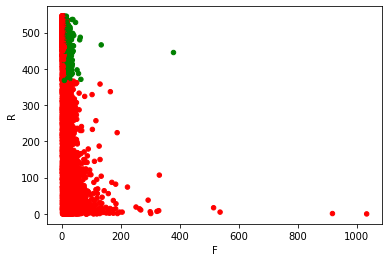

In [34]:
rfm.loc[rfm.label=='重要价值客户','color']='g'
rfm.loc[~(rfm.label=='重要价值客户'),'color']='r'
rfm.plot.scatter('F','R',c=rfm.color)

In [35]:
pivot_counts=df.pivot_table(
                        index='user_id',
    columns='month',
    values='order_dt',
    aggfunc='count'
).fillna(0)
pivot_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_purchase=pivot_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [37]:
def active_status(data):
    status = []
    for i in range(18):
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status                   

In [38]:
purchase_status=df_purchase.apply(active_status,axis=1)

In [39]:
purchase_status

user_id
1        [new, unactive, unactive, unactive, unactive, ...
2        [new, unactive, unactive, unactive, unactive, ...
3        [new, unactive, return, active, unactive, unac...
4        [new, unactive, unactive, unactive, unactive, ...
5        [new, active, unactive, return, active, active...
                               ...                        
23566    [unreg, unreg, new, unactive, unactive, unacti...
23567    [unreg, unreg, new, unactive, unactive, unacti...
23568    [unreg, unreg, new, active, unactive, unactive...
23569    [unreg, unreg, new, unactive, unactive, unacti...
23570    [unreg, unreg, new, unactive, unactive, unacti...
Length: 23570, dtype: object